In [1]:
import sys
import os
sys.path.append(os.getcwd().replace(os.path.join('music_xml_parser', 'ipynb'), ''))
import music_xml_parser as mp
from music21 import * 
import csv
from IPython.display import HTML, display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 9999)
pd.set_option('display.width', 10)
pd.set_option('display.max_colwidth', 2)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
# Mit diesen Befehlen wird nicht nur der CAMAT music_xml_parser, 
# sondern darüber hinaus die Bibliotheken 'numpy' und 'pandas' für statische Auswertungen, 
# 'music21' sowieund 'matplotlib' für grafische Darstellungen geladen. 

# Mit den folgenden Befehlen wird die Formtierung für die Tabellen festgelegt, 
# die weiter unten dargestellt werden - '9999' ist der Maximalwert: 

# Hierdurch wird der Download von xml-Dateien aus dem Internet ermöglicht. 

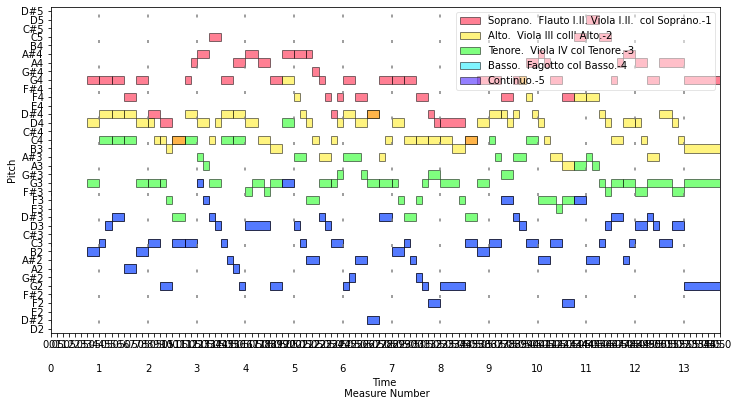

,Onset,Duration,Pitch,Octave,MIDI,Measure,LocalOnset,Voice,PartID,PartName,MeasureOnset,MeasureDuration,MeasureDurrDiff,TimeSignature,TimeSignatureAdjusted,Upbeat,ChordTag,TieType,GraceTag
0,0.0,3.0,rest,rest,NaN,0,0.0,1,1,Soprano. Flauto I.II. Viola I.II. col Soprano.,0.0,4.0,NaN,4/4,16/16,True,none,none,none
1,3.0,1.0,G,4,67.0,0,3.0,1,1,Soprano. Flauto I.II. Viola I.II. col Soprano.,0.0,4.0,3.0,4/4,16/16,True,none,none,none
2,4.0,1.0,G,4,67.0,1,0.0,1,1,Soprano. Flauto I.II. Viola I.II. col Soprano.,4.0,4.0,0.0,4/4,16/16,False,none,none,none
3,5.0,1.0,G,4,67.0,1,1.0,1,1,Soprano. Flauto I.II. Viola I.II. col Soprano.,4.0,4.0,0.0,4/4,16/16,False,none,none,none
4,6.0,1.0,F,4,65.0,1,2.0,1,1,Soprano. Flauto I.II. Viola I.II. col Soprano.,4.0,4.0,0.0,4/4,16/16,False,none,none,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,49.5,0.5,D,3,50.0,12,1.5,1,5,Continuo.,48.0,4.0,0.0,4/4,16/16,False,none,none,none
307,50.0,1.0,C,3,48.0,12,2.0,1,5,Continuo.,48.0,4.0,0.0,4/4,16/16,False,none,none,none
308,51.0,1.0,D,3,50.0,12,3.0,1,5,Continuo.,48.0,4.0,0.0,4/4,16/16,False,none,none,none
309,52.0,3.0,G,2,43.0,13,0.0,1,5,Continuo.,48.0,4.0,1.0,4/4,16/16,True,none,stop,none


In [2]:
xml_file = 'BaJoSe_BWV18_COM_5-5_CantataGle_004_00110.xml'

m_df = mp.parse.with_xml_file(file=xml_file,
                              save_file_name=None,
                              do_save=False,
                              ignore_upbeat=False,
                              ignore_ties=False, 
                              plot_pianoroll=True)

m_df

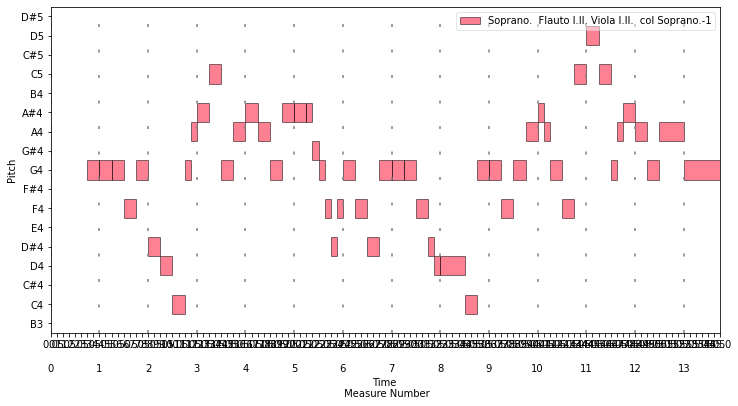

,Onset,Duration,Pitch,Octave,MIDI,Measure,LocalOnset,Voice,PartID,PartName,MeasureOnset,MeasureDuration,MeasureDurrDiff,TimeSignature,TimeSignatureAdjusted,Upbeat,ChordTag,TieType,GraceTag
0,0.0,3.0,rest,rest,NaN,0,0.0,1,1,Soprano. Flauto I.II. Viola I.II. col Soprano.,0.0,4.0,NaN,4/4,16/16,True,none,none,none
1,3.0,1.0,G,4,67.0,0,3.0,1,1,Soprano. Flauto I.II. Viola I.II. col Soprano.,0.0,4.0,3.0,4/4,16/16,True,none,none,none
2,4.0,1.0,G,4,67.0,1,0.0,1,1,Soprano. Flauto I.II. Viola I.II. col Soprano.,4.0,4.0,0.0,4/4,16/16,False,none,none,none
3,5.0,1.0,G,4,67.0,1,1.0,1,1,Soprano. Flauto I.II. Viola I.II. col Soprano.,4.0,4.0,0.0,4/4,16/16,False,none,none,none
4,6.0,1.0,F,4,65.0,1,2.0,1,1,Soprano. Flauto I.II. Viola I.II. col Soprano.,4.0,4.0,0.0,4/4,16/16,False,none,none,none
5,7.0,1.0,G,4,67.0,1,3.0,1,1,Soprano. Flauto I.II. Viola I.II. col Soprano.,4.0,4.0,0.0,4/4,16/16,False,none,none,none
6,8.0,1.0,E-1,4,63.0,2,0.0,1,1,Soprano. Flauto I.II. Viola I.II. col Soprano.,8.0,4.0,0.0,4/4,16/16,False,none,none,none
7,9.0,1.0,D,4,62.0,2,1.0,1,1,Soprano. Flauto I.II. Viola I.II. col Soprano.,8.0,4.0,0.0,4/4,16/16,False,none,none,none
8,10.0,1.0,C,4,60.0,2,2.0,1,1,Soprano. Flauto I.II. Viola I.II. col Soprano.,8.0,4.0,0.0,4/4,16/16,False,none,none,none
9,11.0,0.5,G,4,67.0,2,3.0,1,1,Soprano. Flauto I.II. Viola I.II. col Soprano.,8.0,4.0,0.0,4/4,16/16,False,none,none,none


In [3]:
%matplotlib inline

filter_dict_t = {'PartID':'1'}

# Anschließend wird dem Pianorollenbefehl (s. oben) der Filter als weiterer Parameter hinzugefügt:
# filter_dict=filter_dict_t

m_df_4 = mp.parse.with_xml_file(file=xml_file,
                                ignore_upbeat=False,
                                ignore_ties=False,
                                plot_pianoroll=True,
                                plot_inline_ipynb=True,
                                filter_dict=filter_dict_t)

mp.utils.print_full_df(m_df_4)

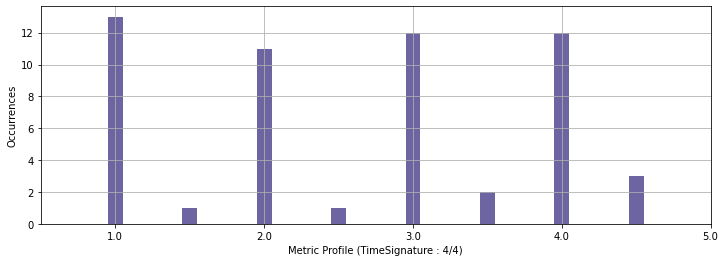

In [4]:
mp_ts_dict_2d = mp.analyse.metric_profile_split_time_signature(m_df_4, 
                                                            do_plot=True)

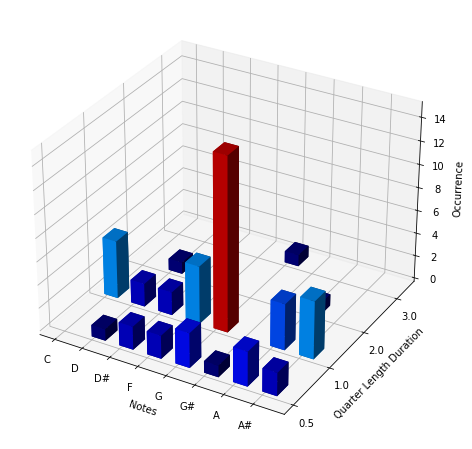

In [5]:
dur_hist = mp.analyse.quarterlength_duration_histogram(m_df_4,
                                                       plot_with='PitchClass',
                                                       do_plot=True)

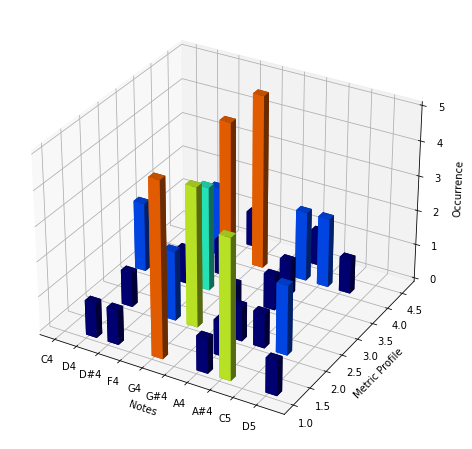

MIDI-Pitch,Tonhöhe,Metrische Position,Anzahl
60,C4,2.0,2
62,D4,0.0,1
62,D4,1.0,1
62,D4,3.5,1
63,D#4,0.0,1
63,D#4,2.0,1
63,D#4,3.0,2
65,F4,1.0,2
65,F4,2.0,3
65,F4,2.5,1


In [6]:
mp_p_hist = mp.analyse.metric_profile(m_df_4, 
                                      plot_with='Pitch', 
                                      do_plot=True)

mp.utils.export_as_csv(data=mp_p_hist, 
                           columns=['MIDI-Pitch','Tonhöhe','Metrische Position','Anzahl'],
                       save_file_name ='metric_profile_hist.csv', 
                       do_save=False,
                       do_print=True, 
                       do_return_pd=False,
                       sep=';', 
                       index=False, 
                       header=True)

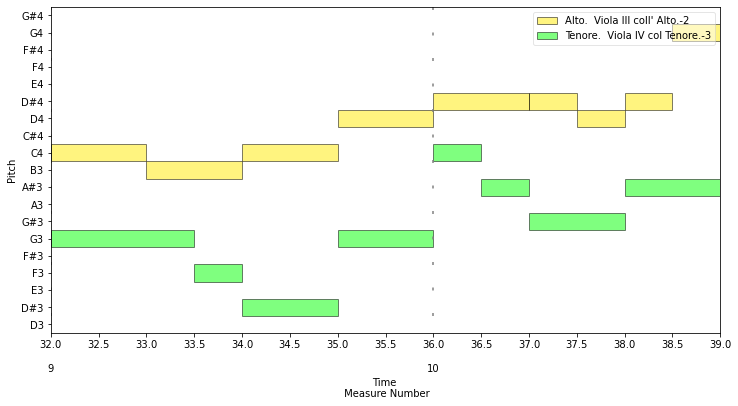

,Onset,Duration,Pitch,Octave,MIDI,Measure,LocalOnset,Voice,PartID,PartName,MeasureOnset,MeasureDuration,MeasureDurrDiff,TimeSignature,TimeSignatureAdjusted,Upbeat,ChordTag,TieType,GraceTag
0,32.0,1.0,C,4,60.0,8,0.0,1,2,Alto. Viola III coll' Alto.,32.0,4.0,0.0,4/4,16/16,False,none,none,none
1,33.0,1.0,B,3,59.0,8,1.0,1,2,Alto. Viola III coll' Alto.,32.0,4.0,0.0,4/4,16/16,False,none,none,none
2,34.0,1.0,C,4,60.0,8,2.0,1,2,Alto. Viola III coll' Alto.,32.0,4.0,0.0,4/4,16/16,False,none,none,none
3,35.0,1.0,D,4,62.0,8,3.0,1,2,Alto. Viola III coll' Alto.,32.0,4.0,0.0,4/4,16/16,False,none,none,none
4,32.0,1.5,G,3,55.0,8,0.0,1,3,Tenore. Viola IV col Tenore.,32.0,4.0,0.0,4/4,16/16,False,none,none,none
5,33.5,0.5,F,3,53.0,8,1.5,1,3,Tenore. Viola IV col Tenore.,32.0,4.0,0.0,4/4,16/16,False,none,none,none
6,34.0,1.0,E-1,3,51.0,8,2.0,1,3,Tenore. Viola IV col Tenore.,32.0,4.0,0.0,4/4,16/16,False,none,none,none
7,35.0,1.0,G,3,55.0,8,3.0,1,3,Tenore. Viola IV col Tenore.,32.0,4.0,0.0,4/4,16/16,False,none,none,none
8,36.0,1.0,E-1,4,63.0,9,0.0,1,2,Alto. Viola III coll' Alto.,36.0,4.0,0.0,4/4,16/16,False,none,none,none
9,37.0,0.5,E-1,4,63.0,9,1.0,1,2,Alto. Viola III coll' Alto.,36.0,4.0,0.0,4/4,16/16,False,none,none,none


In [7]:
%matplotlib inline

filter_dict_t = {'PartID':'2-3', 'Measure':'8-9'}

# Anschließend wird dem Pianorollenbefehl (s. oben) der Filter als weiterer Parameter hinzugefügt:
# filter_dict=filter_dict_t

m_df_2 = mp.parse.with_xml_file(file=xml_file,
                                ignore_upbeat=False,
                                ignore_ties=False,
                                plot_pianoroll=True,
                                plot_inline_ipynb=True,
                                filter_dict=filter_dict_t)

mp.utils.print_full_df(m_df_2)

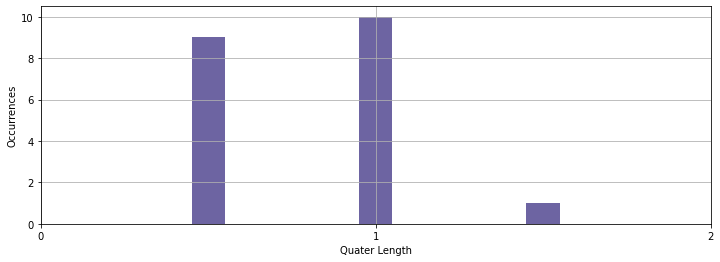

Length,Occurences
0.5,9
1.0,10
1.5,1


In [8]:
quarter_dur_hist = mp.analyse.quarterlength_duration_histogram(m_df_2,
                                                               do_plot=True)

mp.utils.display_table(data=quarter_dur_hist, 
                       columns=['Length','Occurences'])

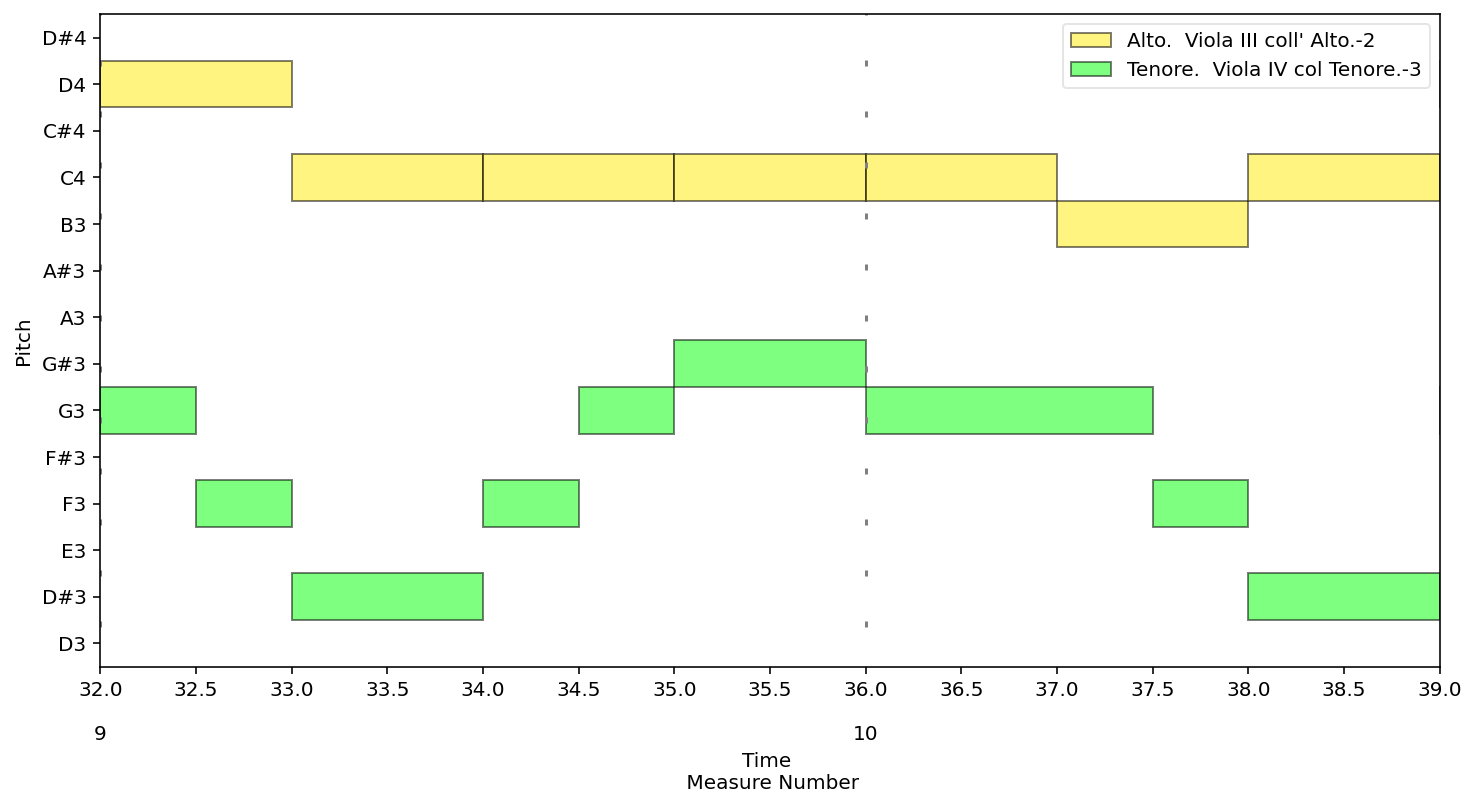

,Onset,Duration,Pitch,Octave,MIDI,Measure,LocalOnset,Voice,PartID,PartName,MeasureOnset,MeasureDuration,MeasureDurrDiff,TimeSignature,TimeSignatureAdjusted,Upbeat,ChordTag,TieType,GraceTag
0,32.0,1.0,D,4,62.0,8,0.0,1,2,Alto. Viola III coll' Alto.,32.0,4.0,NaN,4/4,16/16,nan,none,none,none
1,33.0,1.0,C,4,60.0,8,1.0,1,2,Alto. Viola III coll' Alto.,32.0,4.0,NaN,4/4,16/16,nan,none,none,none
2,34.0,1.0,C,4,60.0,8,2.0,1,2,Alto. Viola III coll' Alto.,32.0,4.0,NaN,4/4,16/16,nan,none,none,none
3,35.0,1.0,C,4,60.0,8,3.0,1,2,Alto. Viola III coll' Alto.,32.0,4.0,NaN,4/4,16/16,nan,none,none,none
4,32.0,0.5,G,3,55.0,8,0.0,1,3,Tenore. Viola IV col Tenore.,32.0,4.0,NaN,4/4,16/16,nan,none,none,none
5,32.5,0.5,F,3,53.0,8,0.5,1,3,Tenore. Viola IV col Tenore.,32.0,4.0,NaN,4/4,16/16,nan,none,none,none
6,33.0,1.0,E-1,3,51.0,8,1.0,1,3,Tenore. Viola IV col Tenore.,32.0,4.0,NaN,4/4,16/16,nan,none,none,none
7,34.0,0.5,F,3,53.0,8,2.0,1,3,Tenore. Viola IV col Tenore.,32.0,4.0,NaN,4/4,16/16,nan,none,none,none
8,34.5,0.5,G,3,55.0,8,2.5,1,3,Tenore. Viola IV col Tenore.,32.0,4.0,NaN,4/4,16/16,nan,none,none,none
9,35.0,1.0,A-1,3,56.0,8,3.0,1,3,Tenore. Viola IV col Tenore.,32.0,4.0,NaN,4/4,16/16,nan,none,none,none


In [9]:
%matplotlib inline

filter_dict_t = {'PartID':'2-3', 'Measure':'8-9'}

# Anschließend wird dem Pianorollenbefehl (s. oben) der Filter als weiterer Parameter hinzugefügt:
# filter_dict=filter_dict_t

m_df_3 = mp.parse.with_xml_file(file=xml_file,
                                ignore_upbeat=True,
                                ignore_ties=True,
                                plot_pianoroll=True,
                                plot_inline_ipynb=True,
                                filter_dict=filter_dict_t)

mp.utils.print_full_df(m_df_3)

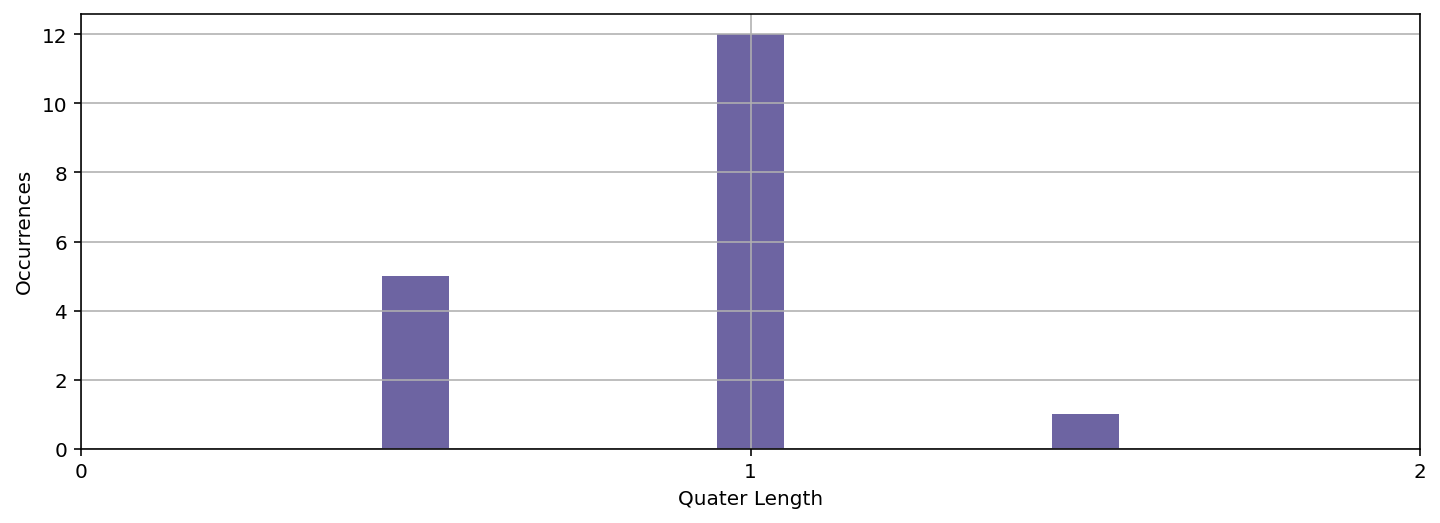

Length,Occurences
0.5,5
1.0,12
1.5,1


In [10]:
quarter_dur_hist_2 = mp.analyse.quarterlength_duration_histogram(m_df_3,
                                                               do_plot=True)

mp.utils.display_table(data=quarter_dur_hist_2, 
                       columns=['Length','Occurences'])